In [1]:
import numpy as np
from typing import List, Dict, Tuple, Union
from numpy.typing import ArrayLike
from nn import *
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

#get dataset with inputs and dataset with assignments
X = digits.data
y = digits.target 

print(X.shape)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

(1797, 64)


In [4]:
#create neural network
ae_arch = [
    {
        'input_dim': 64, 
        'output_dim': 16, 
        'activation': 'relu'
    },
    {
        'input_dim': 16, 
        'output_dim': 64, 
        'activation': 'relu'
    }
]

#nn = nn.NeuralNetwork(nn_arch = ae_arch, lr = 0.0001, seed = 42, batch_size = 100, epochs = 1000, loss_function = 'mean_squared_error')

In [5]:
from itertools import product

# Define hyperparameter grid
hp_grid = {
    "learning_rate": [0.0001, 0.00005, 0.00001],     # Test different learning rates
    "batch_size": [100, 200, 500],             # Different batch sizes
    "epochs": [10, 100, 1000]                  # Number of training epochs
}

# hyperparameter combinations
hp_combos = list(product(*hp_grid.values()))

#track best models
best_loss = float("inf")
best_params = None
results = []

In [6]:

#iterate through all combinations of the hyperparameters that were tested
for index, params in enumerate(hp_combos):
    lr, batch_size, epochs = params
    nn_tune = nn.NeuralNetwork(nn_arch = ae_arch, lr = lr, seed = 42, batch_size = batch_size, epochs = epochs, loss_function = "mean_squared_error")

    #train autoencoder on the "training" and "validation" sets, which should be the same since it is an autoencoder
    loss_train, loss_val = nn_tune.fit(X_train, X_train, X_val, X_val)
    
    #keep track of results
    final_loss = loss_val[-1]
    results.append((params, final_loss))
    #print(results[index])

    #find which combination had resulted in the lowest loss
    if loss_val[-1] < best_loss:
        best_loss = loss_val[-1]
        best_params = params

print(f"Best Hyperparameters: {best_params}, Validation Loss: {best_loss: .5f}")

Best Hyperparameters: (5e-05, 100, 1000), Validation Loss:  5.76738


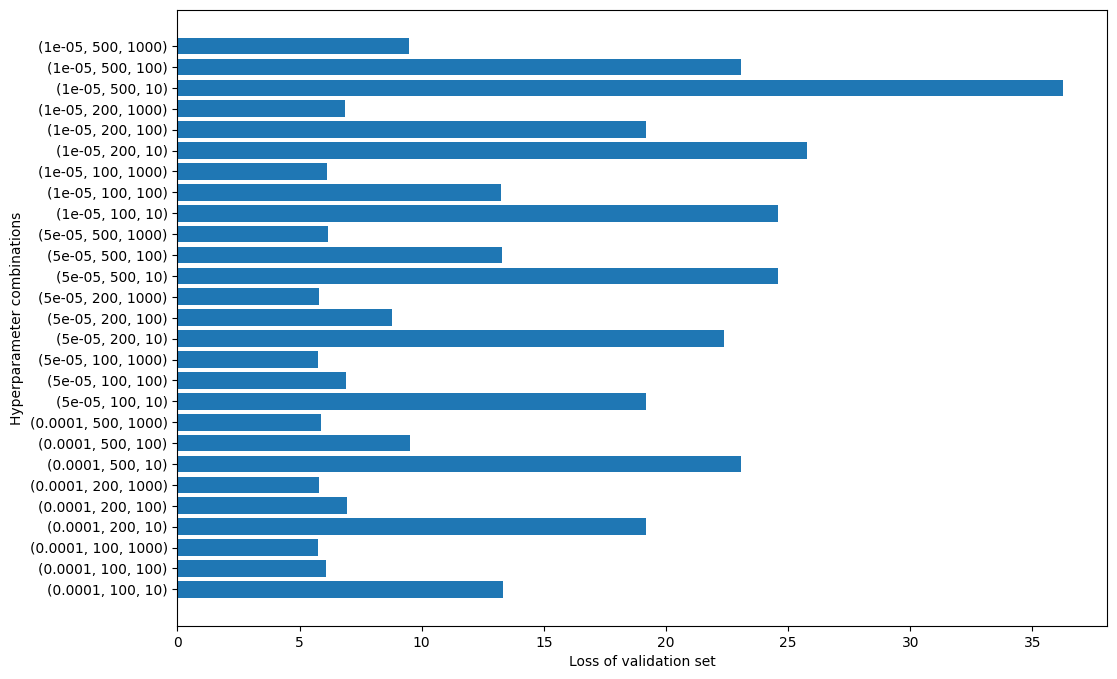

In [7]:
#plot
val_loss = [result[1] for result in results]
hps = [str(result[0]) for result in results]

plt.figure(figsize = (12,8))
plt.barh(hps, val_loss)
plt.xlabel("Loss of validation set")
plt.ylabel("Hyperparameter combinations")
plt.show()

Hyperparameters rationale:

Based on the previous results, I chose a learning rate of 5e-05, a batch size of 100, and 1000 as number of epochs to run. This resulted in the best performance of my model, which in general tends to perform better with smaller learning rates and batch sizes and larger number of epochs for this dataset. When I tried a larger learning rate, the results looked significantly worse. 

In [9]:
hp_tuned = nn.NeuralNetwork(nn_arch = ae_arch, lr = 0.00005, seed = 42, batch_size = 100, epochs = 1000, loss_function = "mean_squared_error")

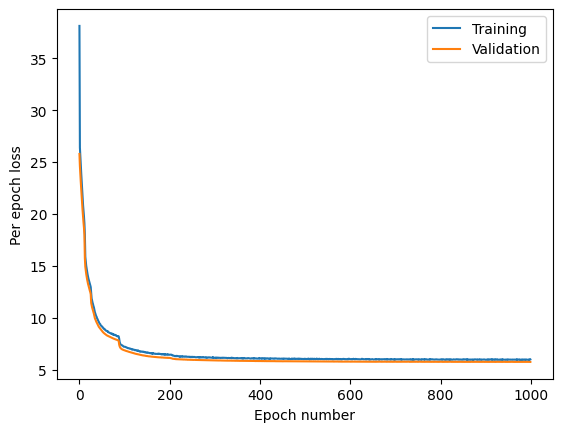

In [10]:
train_loss, val_loss = hp_tuned.fit(X_train, X_train, X_val, X_val)

plt.plot(train_loss)
plt.plot(val_loss)
plt.legend(labels = ['Training', 'Validation'])
plt.xlabel('Epoch number')
plt.ylabel('Per epoch loss')
plt.show()

In [11]:
#reconstruction

# Use the trained autoencoder to reconstruct the validation set
X_val_reconstructed = hp_tuned.predict(X_val)

# Calculate the mean squared reconstruction error
reconstruction_error = hp_tuned._mean_squared_error(X_val.T, X_val_reconstructed)
print(f'Average reconstruction error: {reconstruction_error}')

Average reconstruction error: 5.767378477866251
